Rulan Xiao
rx2153

# Part I: Classification

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import pylab
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
#from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
import matplotlib.pyplot as plt
from numpy import where
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
import numpy.random as nprnd
import random
import seaborn
import pydotplus
from __future__ import print_function
from PIL import Image, ImageFilter
import graphviz
import os
import subprocess
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
import pydotplus
from IPython.display import Image 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import KFold
from sklearn import preprocessing

/Users/rulanxiao/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/rulanxiao/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [2]:
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head(10)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
6,No,Yes,919.588530,7491.558572
7,No,No,825.513331,24905.226578
8,No,Yes,808.667504,17600.451344
9,No,No,1161.057854,37468.529288
10,No,No,0.000000,29275.268293


2) Convert `default` and `student` to categorical variables.

In [3]:
df['default'] = pd.get_dummies(df['default'])['Yes']
df['student'] = pd.get_dummies(df['student'])['Yes']
df.head(10)

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879
6,0,1,919.588530,7491.558572
7,0,0,825.513331,24905.226578
8,0,1,808.667504,17600.451344
9,0,0,1161.057854,37468.529288
10,0,0,0.000000,29275.268293


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

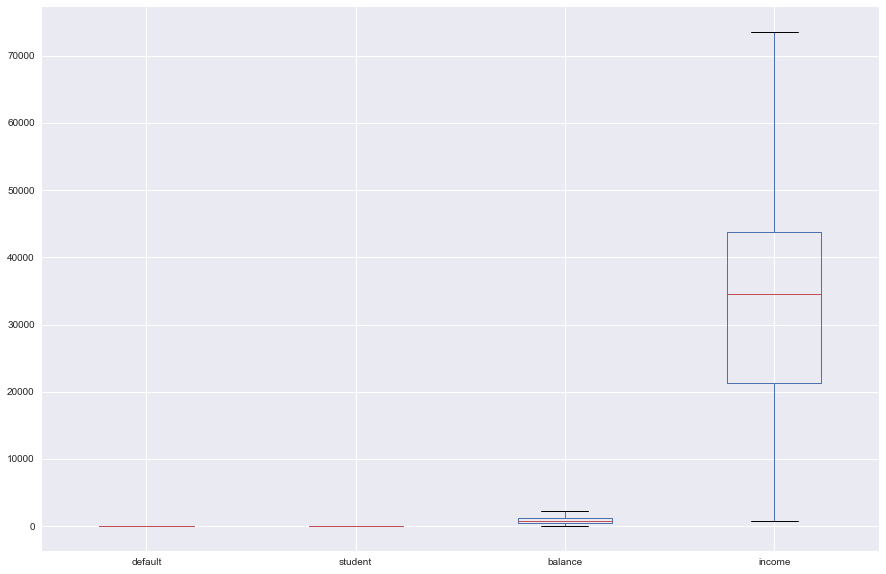

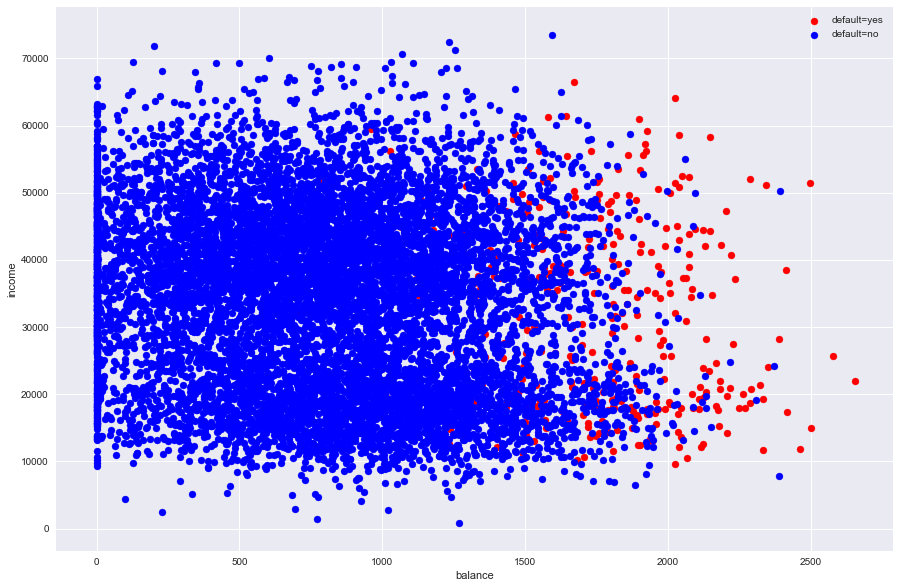

In [4]:
#box plot
plt.figure(figsize = (15,10))
df.boxplot()
plt.show()

#scatter
zyes=df[df['default']==1]
zno=df[df['default']==0]

plt.figure(figsize = (15,10))
plt.scatter(zyes['balance'], zyes['income'], color='r',label='default=yes')
plt.scatter(zno['balance'], zno['income'], color='b',label='default=no')
plt.xlabel('balance')
plt.ylabel('income')
plt.legend()
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

decision boundary shown as below


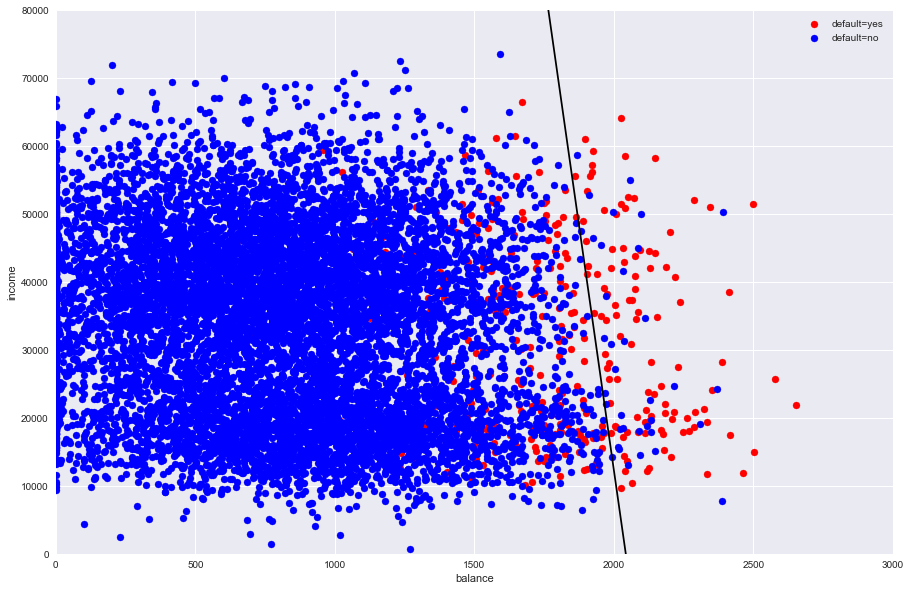

In [5]:
X=df[['balance','income']]
y=df['default']
X = np.array(X.values)
y = np.array(y.values)

logreg = LogisticRegression(penalty='l1')
logreg.fit(X, y)
c1=logreg.coef_[0][0]
c2=logreg.coef_[0][1]
intc=logreg.intercept_

xa=np.arange(0,3000,1)
ya=-(intc+c1*xa)/c2

print('decision boundary shown as below')
plt.figure(figsize = (15,10))
plt.scatter(zyes['balance'], zyes['income'], color='r',label='default=yes')
plt.scatter(zno['balance'], zno['income'], color='b',label='default=no')
plt.xlabel('balance')
plt.ylabel('income')
plt.plot(xa, ya, c='black')
plt.xlim(0,3000)
plt.ylim(0, 80000)
plt.legend()
plt.show()

Area under the ROC curve : 0.960720


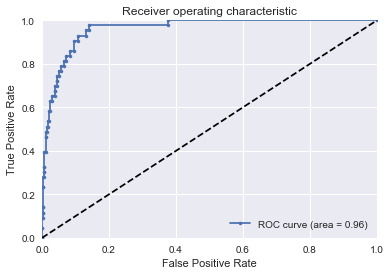

In [6]:
# AUC

# X are features and y is predictive variable - cancelled HD or not.
X = df[['balance', 'income']]
#y = df['y'].apply(lambda y : get_y(y))

# Scale columns for regression.
#scaler = StandardScaler()
#X = X.as_matrix().astype(np.float)
#X = scaler.fit_transform(X)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds


# Generate ROC  for LR with l1 penalty
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,penalty='l1')

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)


5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

decision boundary shown as below


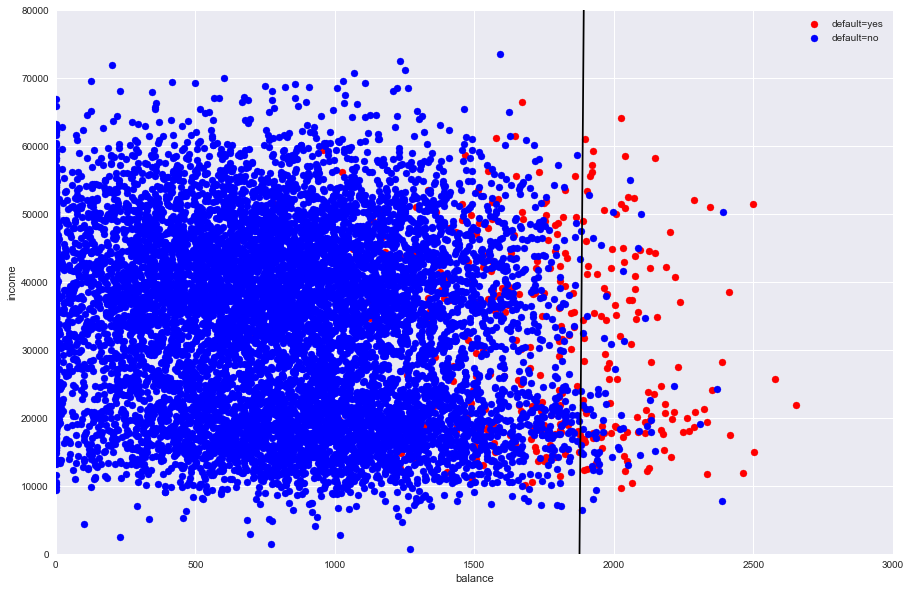

In [7]:
zyes=df[df['default']==1]
zno=df[df['default']==0]

X=df[['balance','income', 'student']]
y=df['default']
X = np.array(X.values)
y = np.array(y.values)

logreg2 = LogisticRegression(penalty='l1')
logreg2.fit(X, y)
c1=logreg2.coef_[0][0]
c2=logreg2.coef_[0][1]
intc=logreg2.intercept_

xa=np.arange(0,3000,1)
ya=-(intc+c1*xa)/c2

print('decision boundary shown as below')
plt.figure(figsize = (15,10))
plt.scatter(zyes['balance'], zyes['income'], color='r',label='default=yes')
plt.scatter(zno['balance'], zno['income'], color='b',label='default=no')
plt.xlabel('balance')
plt.ylabel('income')
plt.plot(xa, ya, c='black')
plt.xlim(0,3000)
plt.ylim(0, 80000)
plt.legend()
plt.show()

Area under the ROC curve : 0.962353


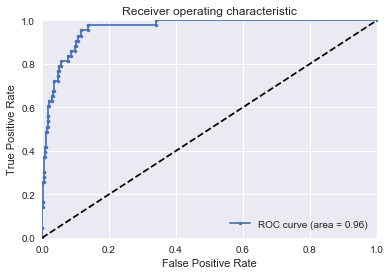

In [8]:
#ROC
X = df[['balance', 'income', 'student']]

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,penalty='l1')
 
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

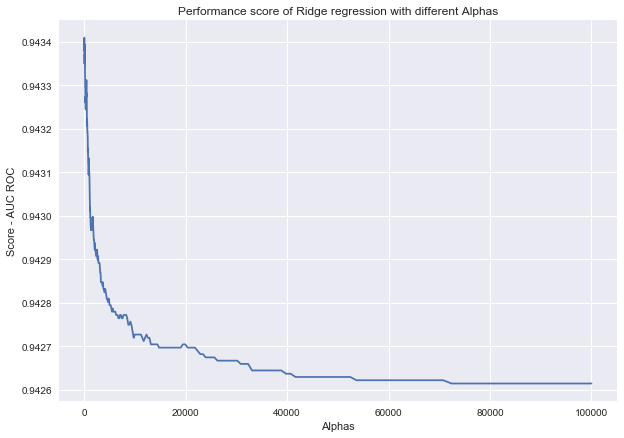

The optimized coefficients by Ridge regression is: [ 1.33005596e-04  2.35236428e-07 -5.93652941e-03]


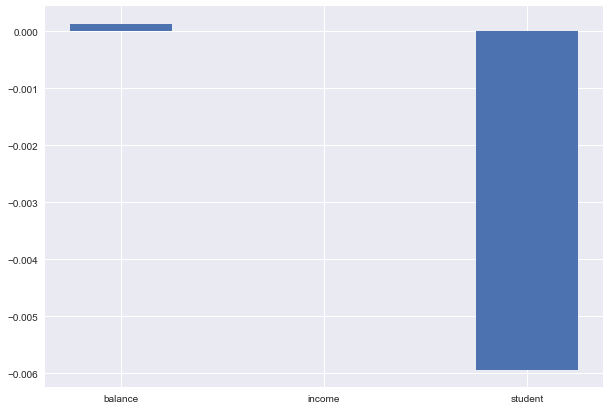

In [9]:
##optimize by ridge
# try without regurization

# Split the data into training/testing sets
X = df[['balance', 'income', 'student']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
alphas=np.logspace(-5,5,1000)

score=[]

for a in alphas:
    regrid = Ridge(alpha=a)
    y_prob = regrid.fit(X_train, y_train).predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    score.append(roc_auc)
    
plt.figure(figsize = (10,7))
plt.plot(alphas,score)
plt.xlabel('Alphas')
plt.ylabel('Score - AUC ROC')
plt.title('Performance score of Ridge regression with different Alphas')
plt.show()


max_sco=max(score)
alpha_best = alphas[score.index(max_sco)]

rreg = Ridge(alpha=alpha_best)
rreg.fit(X_train, y_train)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), rreg.coef_, .5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('balance', 'income','student'))

print ('The optimized coefficients by Ridge regression is:', rreg.coef_)

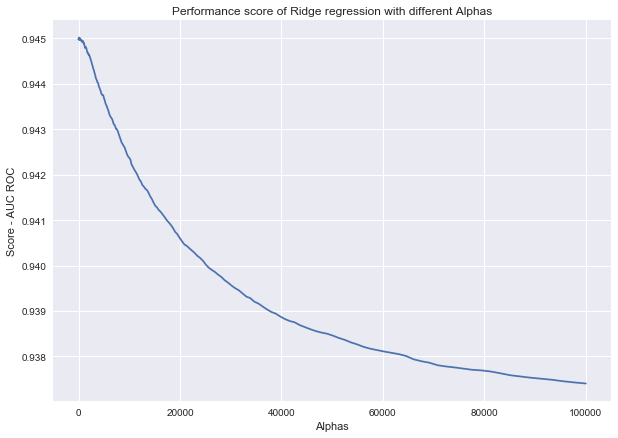

The optimized coefficients by Ridge regression is: [ 0.06589006  0.00511326 -0.00239853]


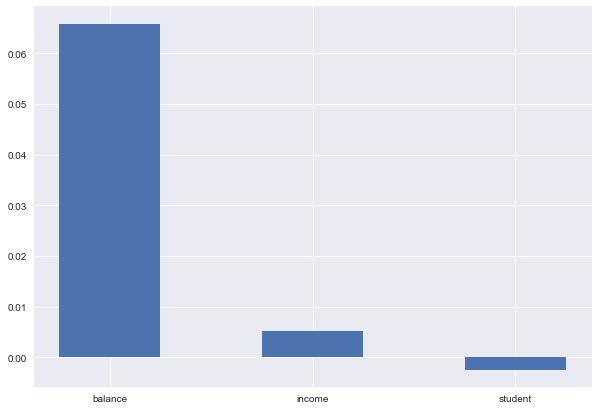

In [10]:
# this time we do regurization first
# Scale columns for regression.

X = df[['balance', 'income', 'student']]

scaler = StandardScaler()
X = scaler.fit_transform(X)

n_samples, n_features = X.shape

half = int(n_samples/2)
X_train, X_test = X[:half], X[half:]
y_train, y_test = y[:half], y[half:]

# Create linear regression object
alphas=np.logspace(-5,5,1000)

score=[]

for a in alphas:
    regrid = Ridge(alpha=a)
    y_prob = regrid.fit(X_train, y_train).predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    score.append(roc_auc)
    
plt.figure(figsize = (10,7))
plt.plot(alphas,score)
plt.xlabel('Alphas')
plt.ylabel('Score - AUC ROC')
plt.title('Performance score of Ridge regression with different Alphas')
plt.show()


max_sco=max(score)
alpha_best = alphas[score.index(max_sco)]

rreg2 = Ridge(alpha=alpha_best)
rreg2.fit(X_train, y_train)


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), rreg2.coef_, .5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('balance', 'income','student'))

print ('The optimized coefficients by Ridge regression is:', rreg2.coef_)

After added a variable, the area under ROC curve not increase much and ranking of student is low, we may conclude that there is no significant improvement with added variable. 

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

random state = 1
Area under the ROC curve : 0.969609


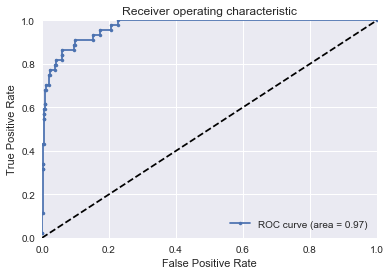

random state = 2
Area under the ROC curve : 0.944709


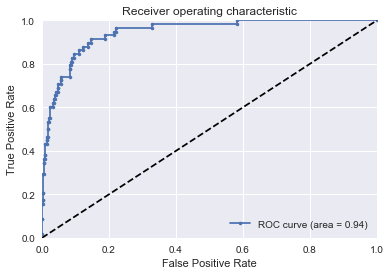

random state = 3
Area under the ROC curve : 0.943351


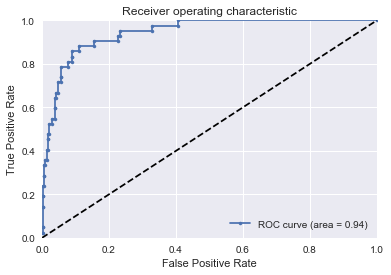

random state = 4
Area under the ROC curve : 0.966765


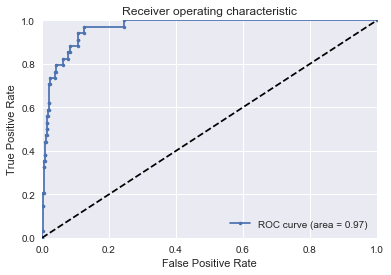

random state = 5
Area under the ROC curve : 0.951309


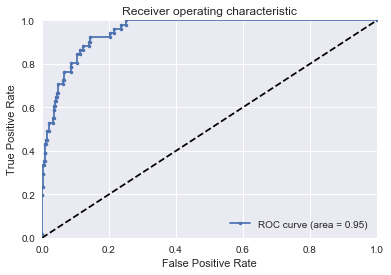

random state = 6
Area under the ROC curve : 0.958596


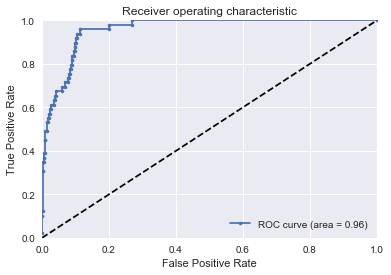

random state = 7
Area under the ROC curve : 0.949935


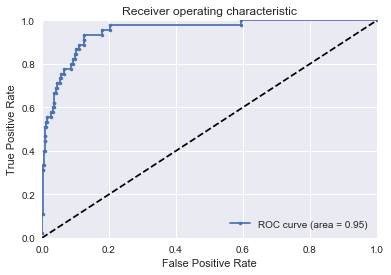

random state = 8
Area under the ROC curve : 0.938213


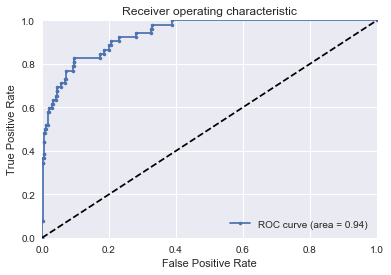

random state = 9
Area under the ROC curve : 0.930799


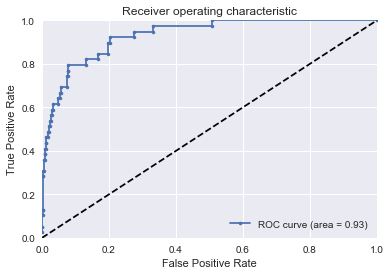

random state = 10
Area under the ROC curve : 0.959834


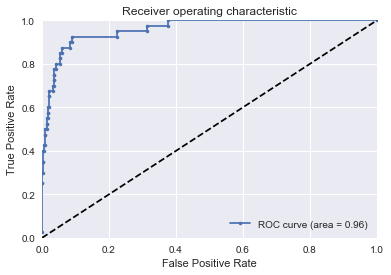

random state = 11
Area under the ROC curve : 0.954383


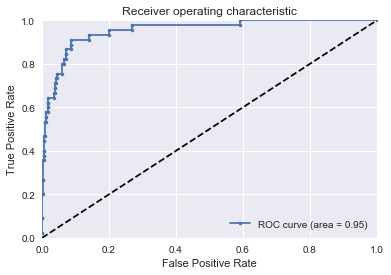

random state = 12
Area under the ROC curve : 0.933871


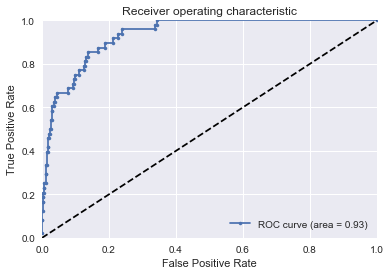

random state = 13
Area under the ROC curve : 0.969924


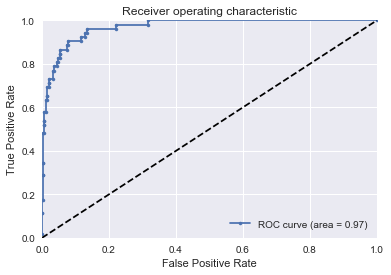

random state = 14
Area under the ROC curve : 0.948484


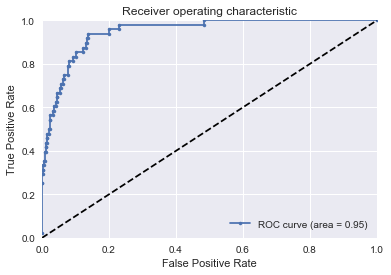

random state = 15
Area under the ROC curve : 0.966063


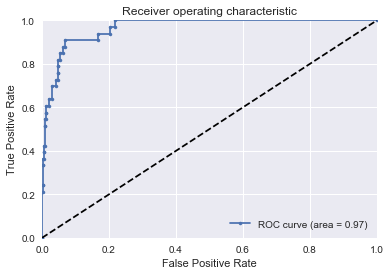

In [11]:
X= df[['balance', 'income', 'student']]
y=df['default']

for i in range(1,16):
    print('random state =',i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    fpr,tpr,roc_auc,thresholds = generate_auc(X_train,y_train,LogisticRegression, penalty='l1')
    generate_ROCplot(fpr,tpr,'LR',roc_auc)


We see all AUC ROC are bigger than 90% and it is good enough to show our model is robust in other random dataset. 

In [12]:
llreg = LogisticRegression(penalty = "l1", C = alpha_best)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(llreg, X_train, y_train, cv = 5)
print('cross validation score=',scores)

cross validation score= [0.97314179 0.97501562 0.97       0.97998749 0.96810507]


Since five cross validation score are very close to one, we may conclude that the model built in (5) is robust.

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

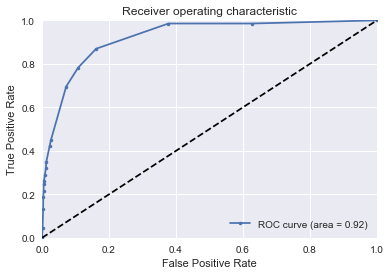

In [13]:
from sklearn.tree import DecisionTreeRegressor
import pydotplus
from IPython.display import Image 
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X=df[['balance','income','student']]
y=df['default']

scaler = StandardScaler()
X_s = scaler.fit_transform(X)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_s, y, test_size=0.2, random_state=42)

regtree = DecisionTreeRegressor(max_depth=5)
regtree.fit(X2_train, y2_train)

y_pred = regtree.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y2_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)


The area under ROC are similar, then we may say two regression have same level of performance. 

But logistic regression has AUC ROC 96%, decision tree has 92%, that means logistic regression is a little bit better than decision tree. 

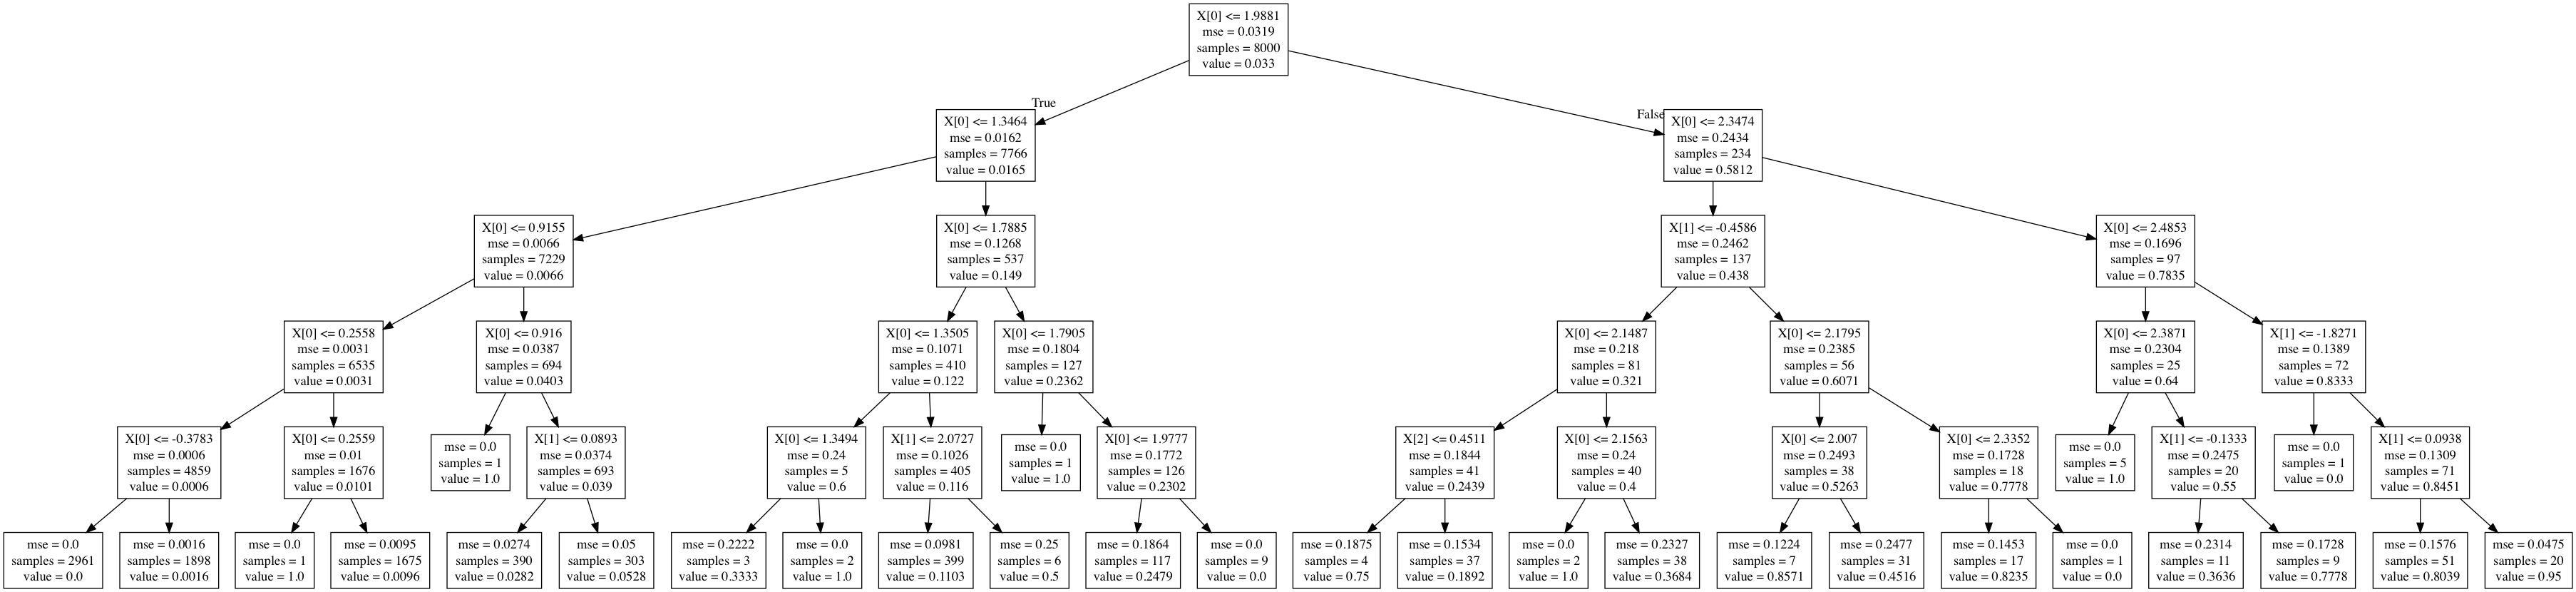

In [14]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

dt=DecisionTreeRegressor(max_depth=5)
visualize_tree(regtree, feature_names=['x'])

dot_data=export_graphviz(regtree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


8) Find the optimal decision tree depth and compute the AUC ROC. 

Optimal decision tree depth is 3.000000


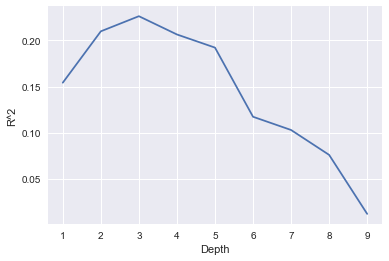

In [15]:
# Fit regression model
X=df[['balance','income','student']]
y=df['default']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,10)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
print (('Optimal decision tree depth is %f')% (n_opt))

Area under the ROC curve : 0.938509


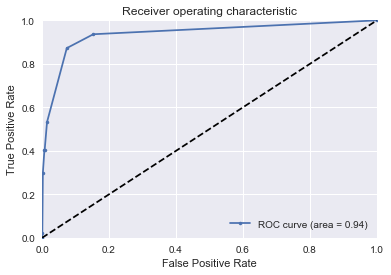

In [16]:
fpr,tpr,roc_auc, thresholds = generate_auc(X_train,y_train,DecisionTreeClassifier,max_depth=n_opt)

generate_ROCplot(fpr,tpr,'LR',roc_auc)

# Part II: Recommendation Systems. 

In this problem we will use the notebook https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/matrix_factorization_recommender.ipynb  as
a starting point.

1) Split the ratings matrix `R_df` into training and testing sets. Remember we need to do this for rows and columns now. 

2) Evaluate the performance of the matrix factorization model for $K=50$. In particular, measure the:
 - Precision.
 - Recall. 

You can round up or down to the nearest integer for the ratings. 

3) Construct an item/item and user/user model, and evaluate the performance as in 2). How does it compare?

4) Check how your answer to 3) changes (if at all) as you try different values of K for K=10, 20, 100. 